# Gradient descent

For every parameter, we could calculate the error for every value it can take. That would give us a function with minima and maxima which we call the gradient.

Once we have that function, we can set the optimal value of the parameter as the one where the error function has a global minimum.

However, it would be computationally expensive to calculate this for every parameter. Instead, we calculate it for a random value, and then we use the slope to tell us were the direction of the minima is.

[Gradient descent video](https://www.youtube.com/watch?v=A6FiCDoz8_4&t=0s)

In [1]:
import numpy
import scipy
import matplotlib.pyplot as pyplot

We choose any function and we calculate the derivative. This one is from Wikipedia because it comes with a nice plot already 😃

![The plot of our function](images/function-plot.png)
![The equation of our function](images/function-equation.png)

We are going to create an anonymous function with `lambda`. The vector of parameters is called `theta` in reference to how parameters are usually called in machine learning maths.

In [2]:
function = lambda theta: numpy.sin(
    1 / 2 * theta[0] ** 2 - 1 / 4 * theta[1] ** 2 + 3
) * numpy.cos(
    2 * theta[0] + 1 - numpy.e ** theta[1]
)

x = 5
y = 3
theta = [x, y]

function(theta)

-0.5956138973318122

This function represents a three-dimensional surface, since we have our two parameters X and Y in one plane, and the loss function in the z axis (in reality we can have billions of parameters in a model, but that would be impossible to visualize).

In [3]:
resolution = 100
limit = 2

_X = numpy.linspace(-limit, limit, resolution)
_Y = numpy.linspace(-limit, limit, resolution)

print(_X)
print(_Y)

[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1.3

Let's calculate the whole function for the set of values of these two vectors/parameters:

In [4]:
_Z = numpy.zeros((resolution, resolution))

for index_x, x in enumerate(_X):
    for index_y, y in enumerate(_Y):
        _Z[index_y, index_x] = function([x, y])

In [5]:
# Theta: random starting point
Theta = numpy.random.rand(2) * 2 * limit - limit
Initial = numpy.copy(Theta)

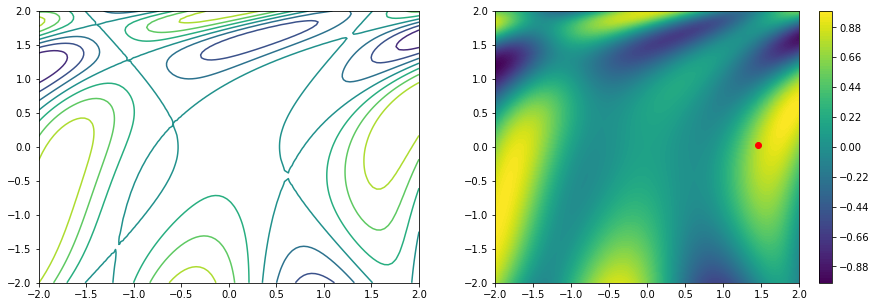

In [6]:
pyplot.subplot(1, 2, 1)
pyplot.contour(_X, _Y, _Z)

pyplot.subplot(1, 2, 2)
pyplot.contourf(_X, _Y, _Z, resolution)
pyplot.colorbar()

pyplot.plot(Theta[0], Theta[1], 'ro')

figure = pyplot.gcf()
figure.set_size_inches(15,5)
pyplot.show()

We are going to calculate the derivative of this random starting point `Theta` by calculating its value after a small increment of X and Y, and then calculating how much the function varied by substracting the value in X, Y:

$Gradient(x, y) = \frac{\Delta f(x, y)}{\Delta x\Delta y} = 
    \frac{f(x + \Delta x, y) - f(x, y)}{\Delta x}, 
    \frac{f(x, y + \Delta y) - f(x, y)}{\Delta y}$

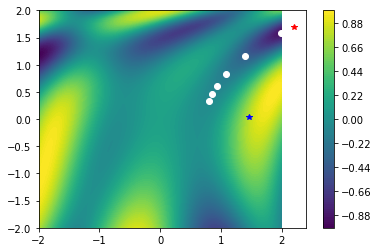

In [7]:
pyplot.contourf(_X, _Y, _Z, resolution)
pyplot.colorbar()
pyplot.plot(Initial[0], Initial[1], 'b*')

delta = 0.001
learning_rate = 0.01
gradient = numpy.zeros(2)

for _ in range(1000):
    gradient[0] = (function([Theta[0] + delta, Theta[1]]) - function(Theta)) / delta
    gradient[1] = (function([Theta[0], Theta[1] + delta]) - function(Theta)) / delta
    
    Theta = Theta - learning_rate * gradient
#     print(function(Theta))

    if (_ != 0 and _ % 100 == 0):
        pyplot.plot(Theta[0], Theta[1], 'wo')
    
pyplot.plot(Theta[0], Theta[1], 'r*')
pyplot.show()

If these values are too random, we could reduce the learning rate an order of magnitude and try again.

We see this iterative process has found the closest minimum to the place where our random starting point was.

If we run this several times for different points we will see different minima are found.